<a href="https://colab.research.google.com/github/Milene-d/TS-vendas/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 5.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [4]:
alucar = pd.read_csv('alucar.csv')
#pd.read_csv('alucel.csv')
#pd.read_csv('cafelura.csv')
#pd.read_csv('chocolura.csv')
#pd.read_csv('dias_final_de_semana.csv')
#pd.read_csv('newsletter_alucar.csv')
#pd.read_csv('vendas_por_dia.csv')

In [5]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [6]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [7]:
print('linhas e colunas:', alucar.shape)

linhas e colunas: (24, 2)


In [8]:
print('Qtd de dados nulos:', alucar.isna().sum().sum())

Qtd de dados nulos: 0


In [9]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

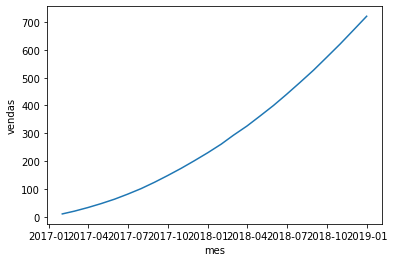

In [10]:
sns.lineplot(x='mes', y='vendas', data = alucar)

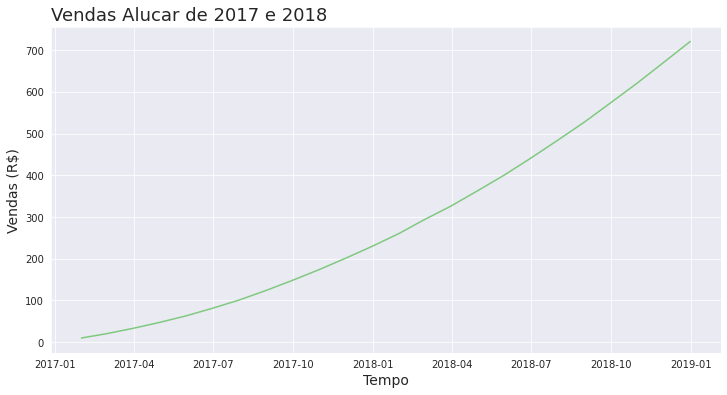

In [11]:
#Melhorar a visualização do gráfico
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax=ax

In [12]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


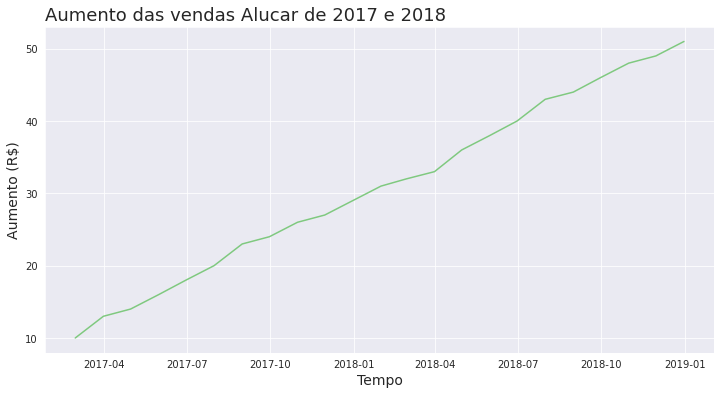

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento (R$)', fontsize = 14)
ax=ax

In [14]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data = dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax=ax  

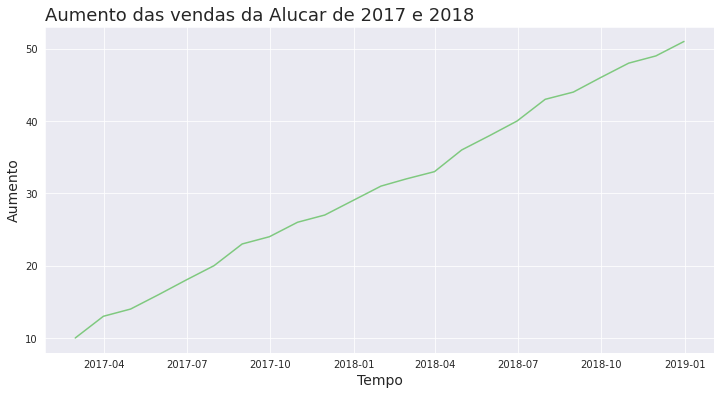

In [15]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [16]:
alucar['aceleracao']= alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


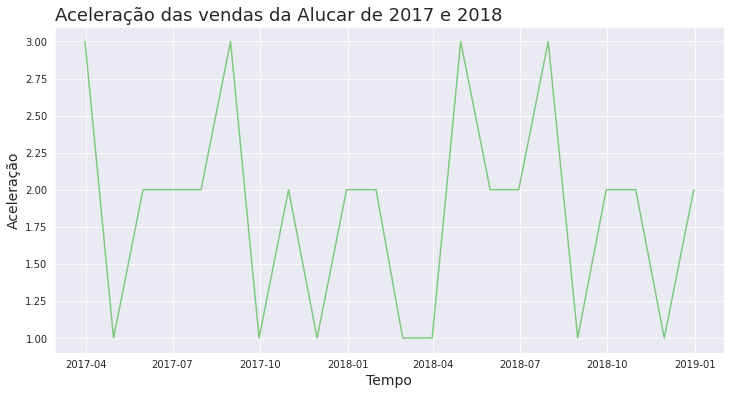

In [17]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

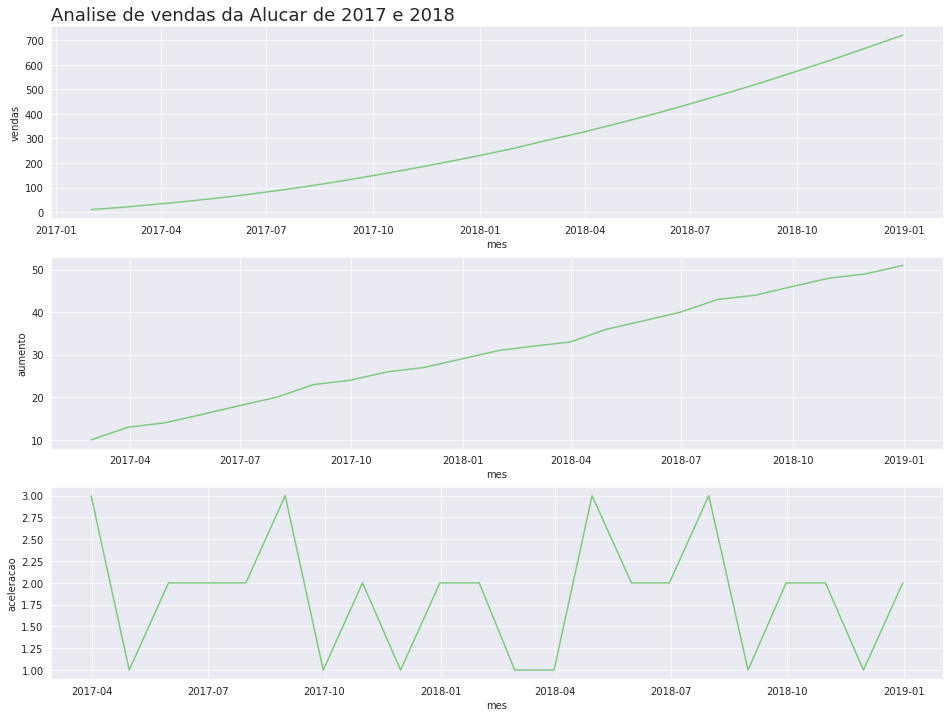

In [18]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise de vendas da Alucar de 2017 e 2018', fontsize = 18, loc= 'left')
sns.lineplot(x='mes', y='vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data = alucar)
ax=ax

In [19]:
def plot_comparacao(x, y1,y2,y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize = 18, loc= 'left')
  sns.lineplot(x=x, y=y1, data = dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data = dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data = dataset)
  ax=ax

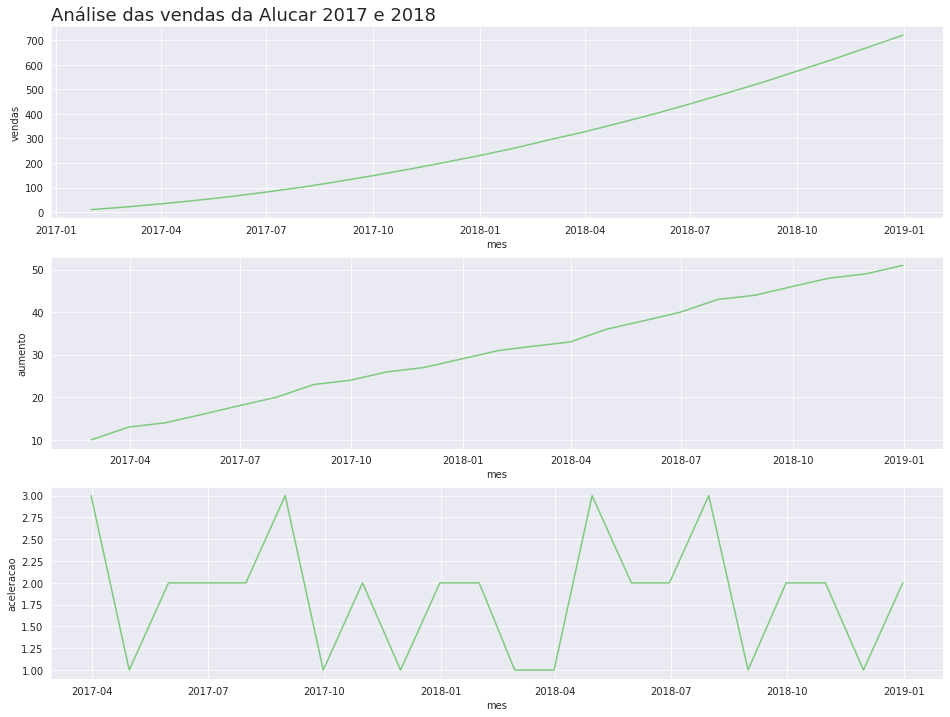

In [20]:
plot_comparacao('mes', 'vendas', 'aumento','aceleracao', alucar, 'Análise das vendas da Alucar 2017 e 2018')

In [21]:
from pandas.plotting import autocorrelation_plot

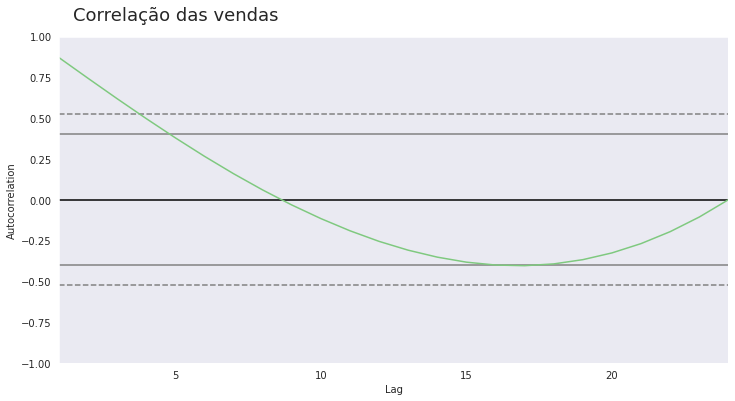

In [22]:
ax=plt.figure(figsize = (12,6))
ax.suptitle('Correlação das vendas', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

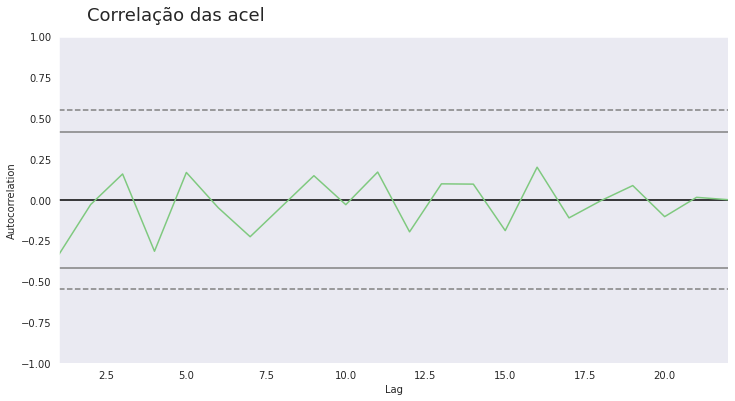

In [23]:
ax=plt.figure(figsize = (12,6))
ax.suptitle('Correlação das acel', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

# **Alucar - Analisando assinantes da newsletter**

In [24]:
assinantes = pd.read_csv('newsletter_alucar.csv')

In [25]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [26]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [28]:
print('qtd de linhas e colunas:', assinantes.shape)
print('qtd de nulos:',assinantes.isna().sum().sum())

qtd de linhas e colunas: (24, 2)
qtd de nulos: 0


In [31]:
assinantes['mes']= pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [32]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


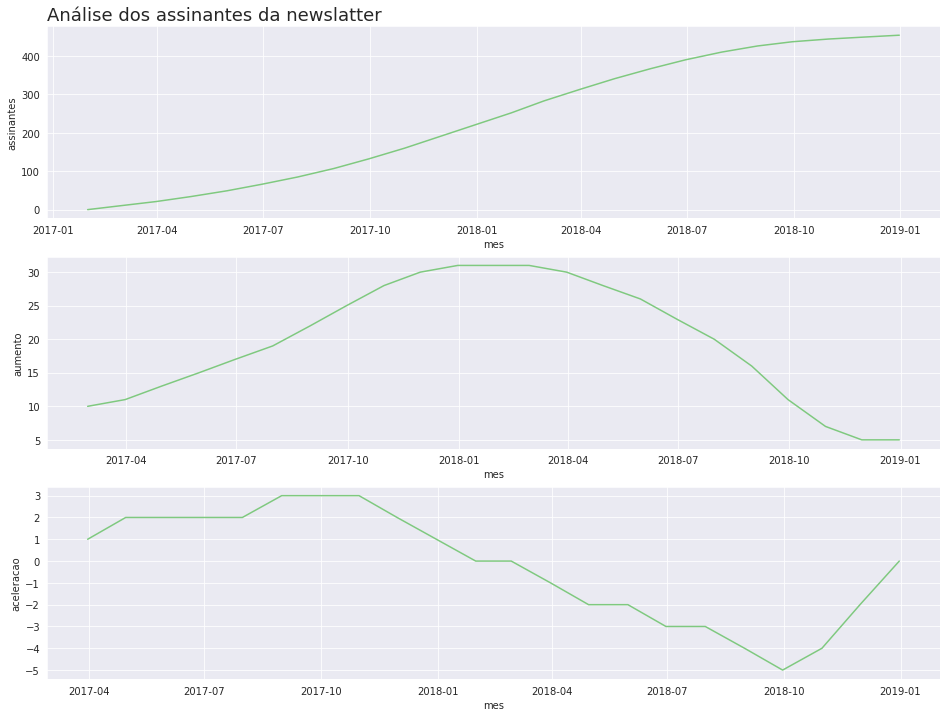

In [33]:
plot_comparacao('mes','assinantes', 'aumento', 'aceleracao', assinantes, 'Análise dos assinantes da newslatter')

# **Chocolura - Analisando as vendas**

In [34]:
chocolura = pd.read_csv('chocolura.csv')

In [35]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [36]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [37]:
chocolura['mes']=pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [39]:
print('Qtd de linhas e colunas:', chocolura.shape)
print('Qtd de dados nulos:', chocolura.isna().sum().sum())

Qtd de linhas e colunas: (24, 2)
Qtd de dados nulos: 0


In [40]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


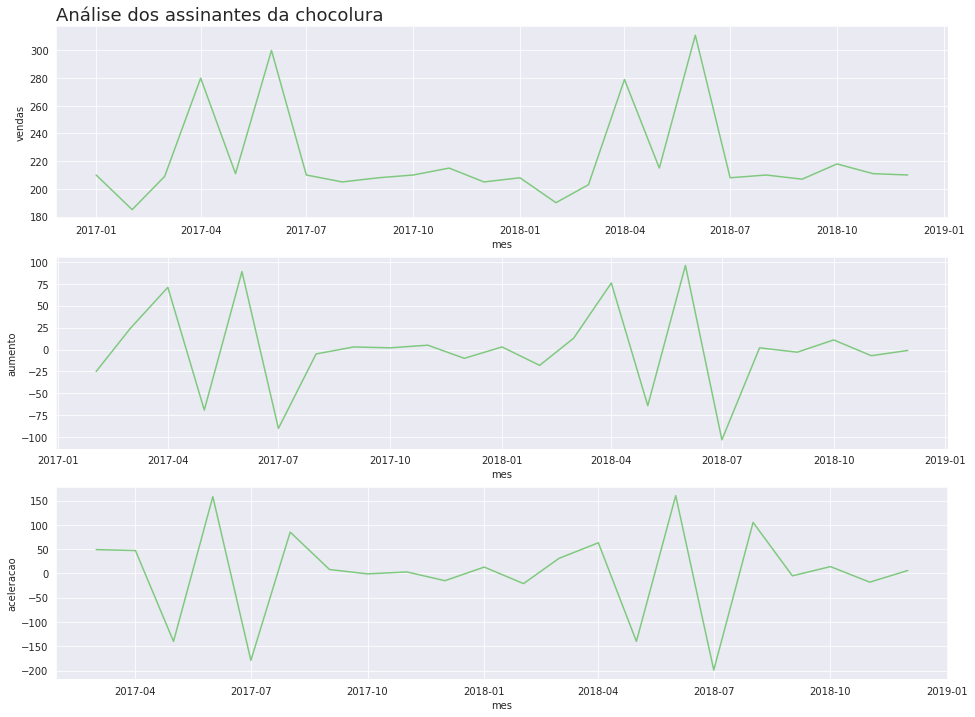

In [41]:
plot_comparacao('mes','vendas', 'aumento', 'aceleracao', chocolura, 'Análise dos assinantes da chocolura')

In [42]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [43]:
print('Qtd de linhas e colunas:', vendas_por_dia.shape)
print('Qtd de dados nulos:', vendas_por_dia.isna().sum().sum())

Qtd de linhas e colunas: (61, 2)
Qtd de dados nulos: 0


In [44]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [45]:
vendas_por_dia['dia']= pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [46]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


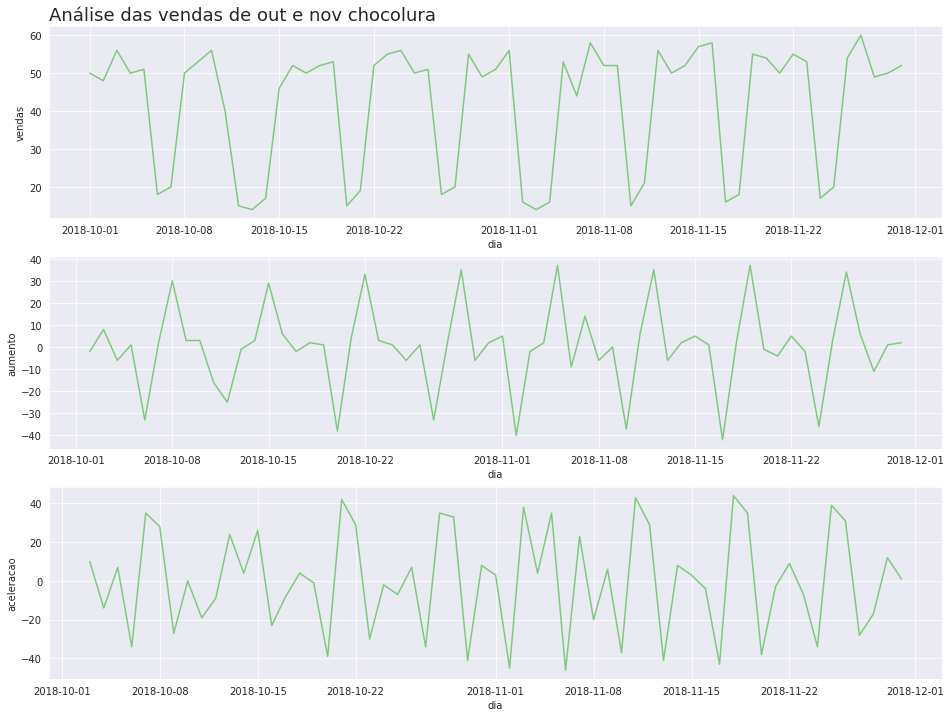

In [48]:
plot_comparacao('dia','vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise das vendas de out e nov chocolura')

# **Análise da Sazonalidade**

In [55]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name

In [56]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,<bound method PandasDelegate._add_delegate_acc...
1,2018-10-02,48,-2.0,NaN,<bound method PandasDelegate._add_delegate_acc...
2,2018-10-03,56,8.0,10.0,<bound method PandasDelegate._add_delegate_acc...
3,2018-10-04,50,-6.0,-14.0,<bound method PandasDelegate._add_delegate_acc...
4,2018-10-05,51,1.0,7.0,<bound method PandasDelegate._add_delegate_acc...
5,2018-10-06,18,-33.0,-34.0,<bound method PandasDelegate._add_delegate_acc...
6,2018-10-07,20,2.0,35.0,<bound method PandasDelegate._add_delegate_acc...


In [ ]:
vendas_por_dia['dia_da_semana'].unique()

In [57]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


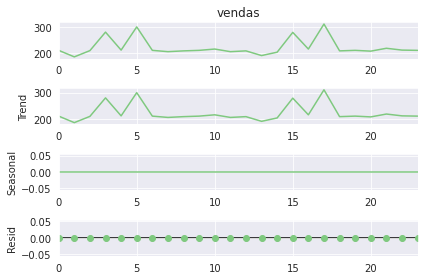

In [65]:
resultado = seasonal_decompose( chocolura['vendas'], freq=1)
ax = resultado.plot()

In [66]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [69]:
data = ({
    'observação': observacao,
    'tendencia': tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)

In [70]:
resultado.head()

,observação,tendencia,sazonalidade,ruido
0,210.0,210.0,0.0,0.0
1,185.0,185.0,0.0,0.0
2,209.0,209.0,0.0,0.0
3,280.0,280.0,0.0,0.0
4,211.0,211.0,0.0,0.0


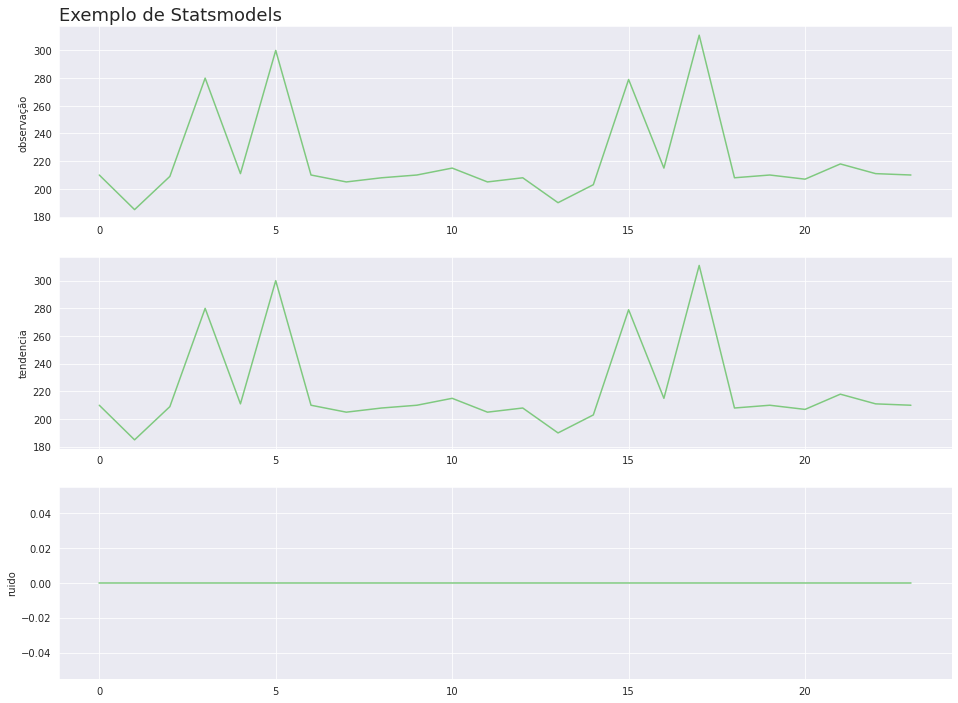

In [73]:
plot_comparacao(resultado.index, 'observação', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

In [74]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [75]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [76]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [77]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

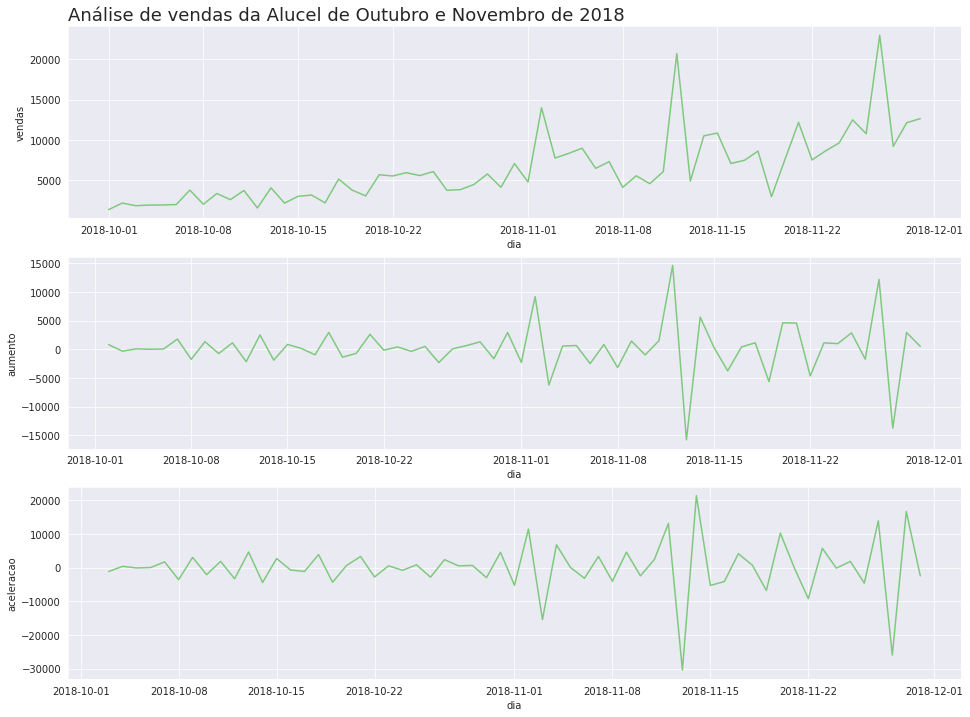

In [78]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

# **Média Móvel para minimizar o ruido**

In [79]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [81]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


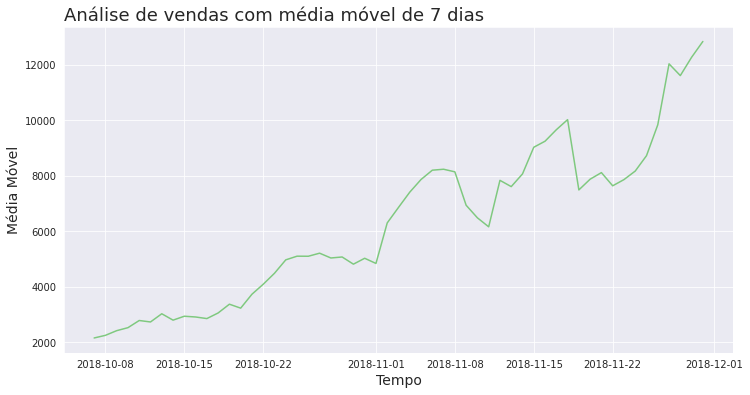

In [82]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [83]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

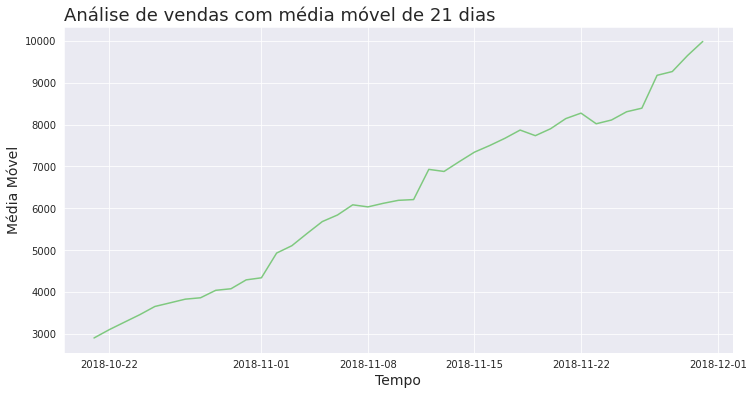

In [84]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

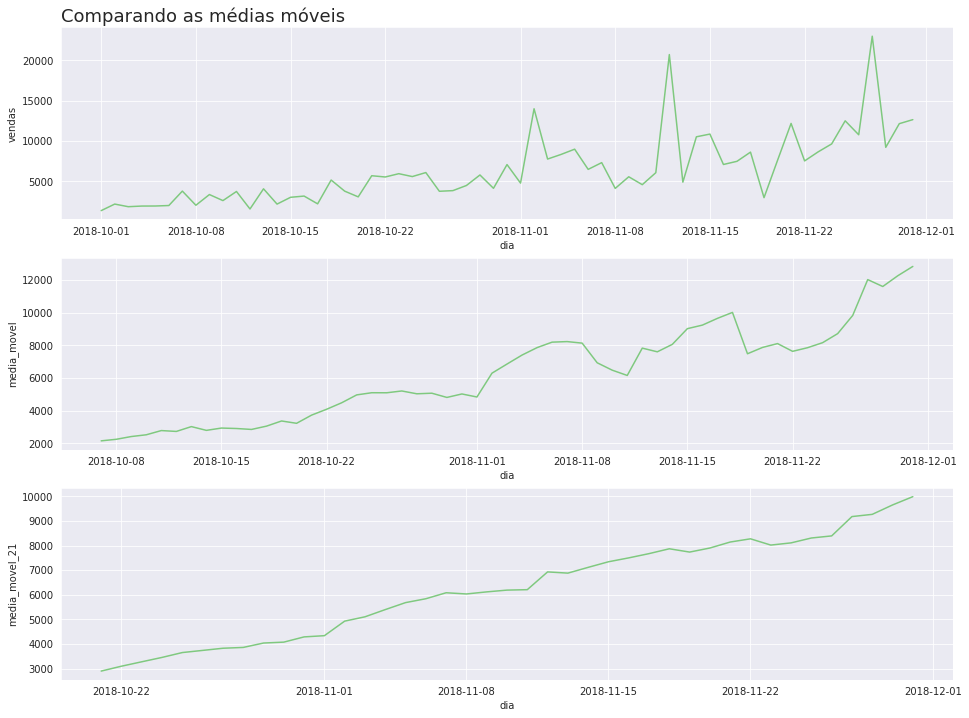

In [85]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')